In [1]:
#this piece of code uploaded from keras doc bcz our gpu shouldnt go above 50% if it goes then tf model wont work properly and results in errors
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
from tensorflow import keras
from keras.layers import Dense,Lambda,Flatten,Input
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.models import Sequential
from keras.optimizers import adam_v2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from sklearn.preprocessing import OneHotEncoder 
from matplotlib.pyplot import imshow
plt.style.use("dark_background")
from PIL import Image

In [5]:
img_size=[128,128]

train_path="C:/Users/U/Downloads/leaf_disease/train/"
test_path="C:/Users/U/Downloads/leaf_disease/test"

In [6]:
inceptionv3=InceptionV3(input_shape=img_size+[3],include_top=False)

In [7]:
#we will not train existing weights
for layer in inceptionv3.layers:
    layer.trainable=False

In [8]:
folder=glob("C:/Users/U/Downloads/leaf_disease/train/*")

In [9]:
len(folder)

4

In [10]:
x=Flatten()(inceptionv3.output)

In [11]:
prediction=Dense(len(folder),activation="softmax")(x)

model=Model(inputs=inceptionv3.input,outputs=prediction)

In [12]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 63, 63, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_94 (BatchN  (None, 63, 63, 32)  96          ['conv2d_94[0][0]']              
 ormalization)                                                                                    
                                                                                              

In [13]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test = ImageDataGenerator(rescale = 1./255)

In [16]:
training=train.flow_from_directory("C:/Users/U/Downloads/leaf_disease/train/",target_size=(128,128),batch_size=32,class_mode="categorical")

testing=test.flow_from_directory("C:/Users/U/Downloads/leaf_disease/test/",target_size=(128,128),batch_size=13,class_mode="categorical")

Found 1951 images belonging to 4 classes.
Found 18 images belonging to 4 classes.


In [17]:
model_main=model.fit_generator(training,validation_data=testing,epochs=10,steps_per_epoch=len(training),validation_steps=len(testing))

<ipython-input-17-0ad8795ffafc>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_main=model.fit_generator(training,validation_data=testing,epochs=10,steps_per_epoch=len(training),validation_steps=len(testing))


Epoch 1/10
61/61 [==============================] - 40s 600ms/step - loss: 1.0346 - accuracy: 0.6981 - val_loss: 0.2647 - val_accuracy: 0.8889
Epoch 2/10
61/61 [==============================] - 34s 564ms/step - loss: 0.5051 - accuracy: 0.8196 - val_loss: 0.2177 - val_accuracy: 0.9444
Epoch 3/10
61/61 [==============================] - 37s 607ms/step - loss: 0.4664 - accuracy: 0.8432 - val_loss: 0.2163 - val_accuracy: 0.9444
Epoch 4/10
61/61 [==============================] - 37s 603ms/step - loss: 0.4323 - accuracy: 0.8534 - val_loss: 0.2048 - val_accuracy: 0.9444
Epoch 5/10
61/61 [==============================] - 36s 589ms/step - loss: 0.3702 - accuracy: 0.8801 - val_loss: 0.0859 - val_accuracy: 0.9444
Epoch 6/10
61/61 [==============================] - 36s 591ms/step - loss: 0.4124 - accuracy: 0.8678 - val_loss: 0.2058 - val_accuracy: 0.9444
Epoch 7/10
61/61 [==============================] - 36s 594ms/step - loss: 0.3466 - accuracy: 0.8811 - val_loss: 0.3038 - val_accuracy: 0.9444

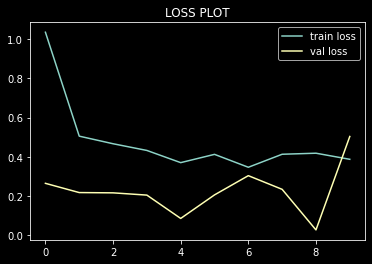

In [19]:
#loss plotting
plt.plot(model_main.history['loss'],label="train loss")
plt.plot(model_main.history["val_loss"],label="val loss")
plt.legend()
plt.title("LOSS PLOT")
plt.show()

Text(0.5, 1.0, 'ACCURACY PLOT')

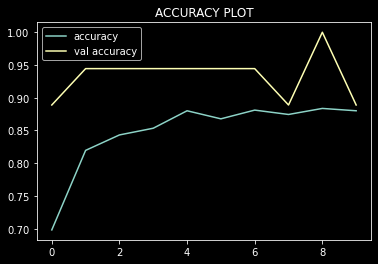

In [30]:
#accuracy plotting
plt.plot(model_main.history["accuracy"],label="accuracy")
plt.plot(model_main.history["val_accuracy"],label="val accuracy")
plt.legend()
plt.title("ACCURACY PLOT")

'The leaf is diseased cotton plant'

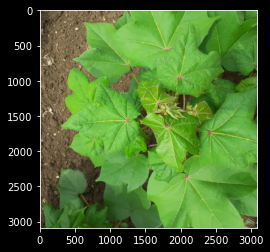

In [53]:
def model_predict(img_path, model):
    img_path=Image.open(r"C:/Users/U/Downloads/leaf_disease/test/diseased cotton plant/dd (41).jpg")
    imshow(img_path)
    img = image.load_img("C:/Users/U/Downloads/leaf_disease/test/diseased cotton plant/dd (41).jpg", target_size=(128, 128))
    # Preprocessing the image
    x = image.img_to_array(img)
    # x = np.true_divide(x, 255)
    ## Scaling
    x=x/255
    x = np.expand_dims(x, axis=0)
    # Be careful how your trained model deals with the input
    # otherwise, it won't make correct prediction!
   # x = preprocess_input(x)

    preds = model.predict(x)
    preds=np.argmax(preds, axis=1)
    if preds==0:
        preds="The leaf is diseased cotton leaf"
    elif preds==1:
        preds="The leaf is diseased cotton plant"
    elif preds==2:
        preds="The leaf is fresh cotton leaf"
    else:
        preds="The leaf is fresh cotton plant"
    return preds

model_predict(img,model)

In [ ]:
from keras.models import load_model
model.save("leaf_disease_detection.h4")